In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# Read data (first leg of journey)
telemetry = pd.read_csv('./telemetry_cleaned.csv')
X_data = telemetry[['Easting', 'Northing', 'WaterDepth','Roll','Pitch','Heading']].head(10000)

In [3]:
def plot2d(data):
	data.plot(kind='scatter', x='Easting', y='Northing')

### Windowed Clustering

This technique involves breaking the points into chunks, the size of each chunk being defined by a `window` variable. DBSCAN clustering is then applied to each chunk and a list of labeled chunks is produced.

In [13]:
window = 250

def windowed_clustering(data: pd.DataFrame) -> list[pd.DataFrame]:
	chunks = []
	results = []
	index = 0

	while index <= data.shape[0]:
		# Get windowed segment (chunk)
		chunk = data.iloc[index:index+window]

		# Run clustering and append chunk
		db = DBSCAN(eps=0.15, min_samples=12).fit(chunk)
		chunk = chunk.assign(Label=db.labels_)
		chunks.append(chunk)

		# TODO: take evaluation metrics
		# silhouette = metrics.silhouette_score(chunk, db.labels_)
		# davies_bouldin = metrics.davies_bouldin_score(chunk, db.labels_)

		# results.append({
		# 	'silhouette': silhouette,
		# 	'davies_bouldin': davies_bouldin
		# })

		index += window

	return chunks

chunks = windowed_clustering(X_data)
print(f'Using a window of {window} points, {len(chunks)} chunks were created')

Using a window of 250 points, 43 chunks were created


Denoise chunks:

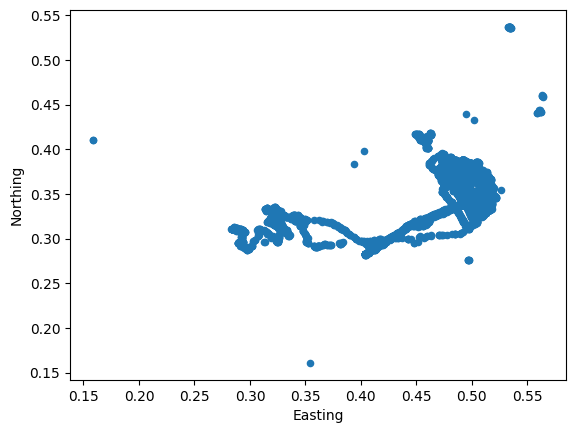

In [14]:
for chunk in chunks:
	chunk = chunk[chunk['Label'] != -1]

X_denoised = pd.concat(chunks)
plot2d(X_denoised)